# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [81]:
import numpy as np
import matplotlib.pyplot as plt

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [82]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
data = iris.data
df = pd.DataFrame(data, columns = [ iris.feature_names])
df_c = pd.DataFrame(data, columns = [ iris.feature_names])

species = iris.target_names#there are 3 species of iris flowers
#print(data.shape)#there are 150 samples with 4 attributes 150/3 species is 50 samples per species it also tells us this information when printing iris
setosa = df[0:49]
versicolor = df[50:99]
virginica = df[100:149]


Make a pair plot of the iris features colored by their true classification.

array([[<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal length (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal width (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('petal length (cm)',)">],
       [<Axes: xlabel="

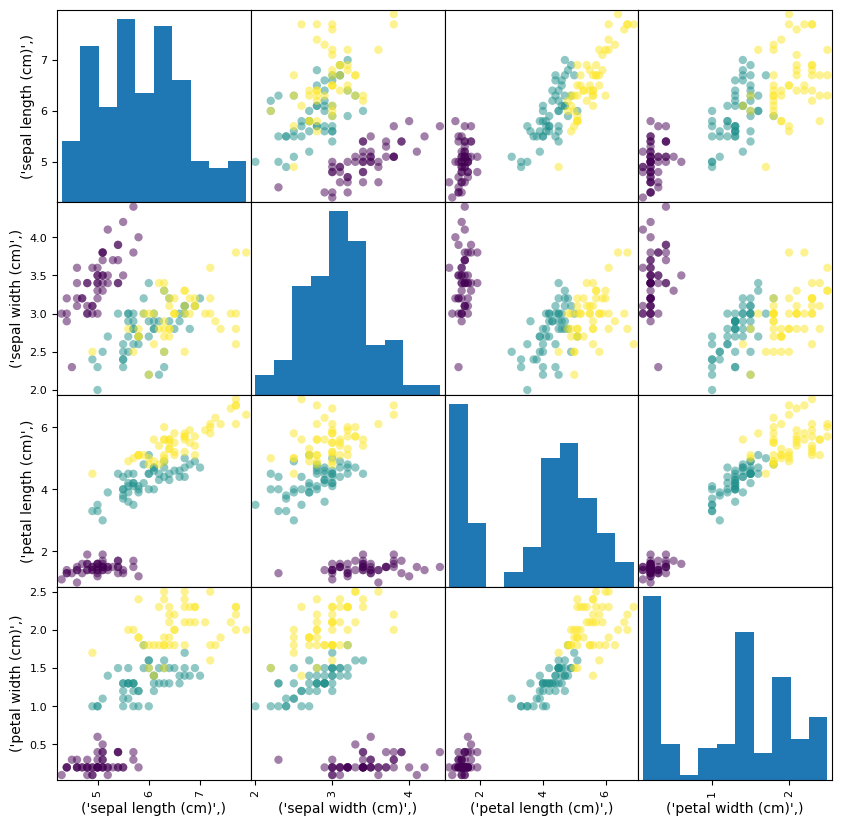

In [ ]:
species_color = iris.target
#print(species_color)

pd.plotting.scatter_matrix(df, marker='o', c=species_color, figsize=(10, 10))#purple is one species, green is another species and yellow is the last species
'''I tried adding a legend with the color of the species but I couldn't figure out how to do it so I just left it as is'''


Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

array([[<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal length (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('sepal width (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('sepal width (cm)',)">],
       [<Axes: xlabel="('sepal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('sepal width (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal length (cm)',)", ylabel="('petal length (cm)',)">,
        <Axes: xlabel="('petal width (cm)',)", ylabel="('petal length (cm)',)">],
       [<Axes: xlabel="

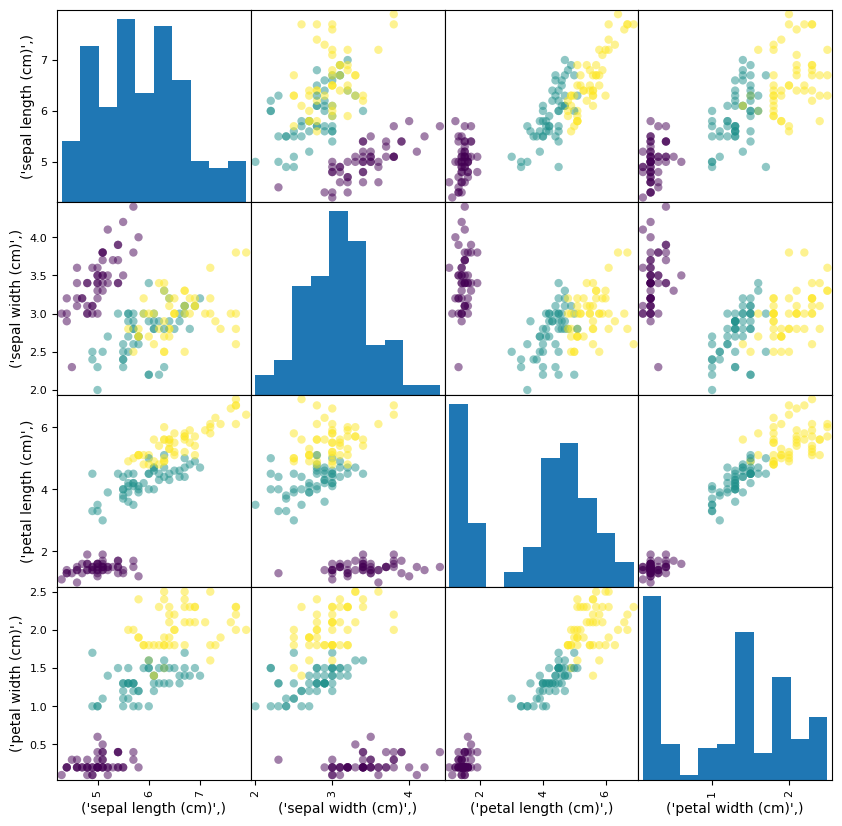

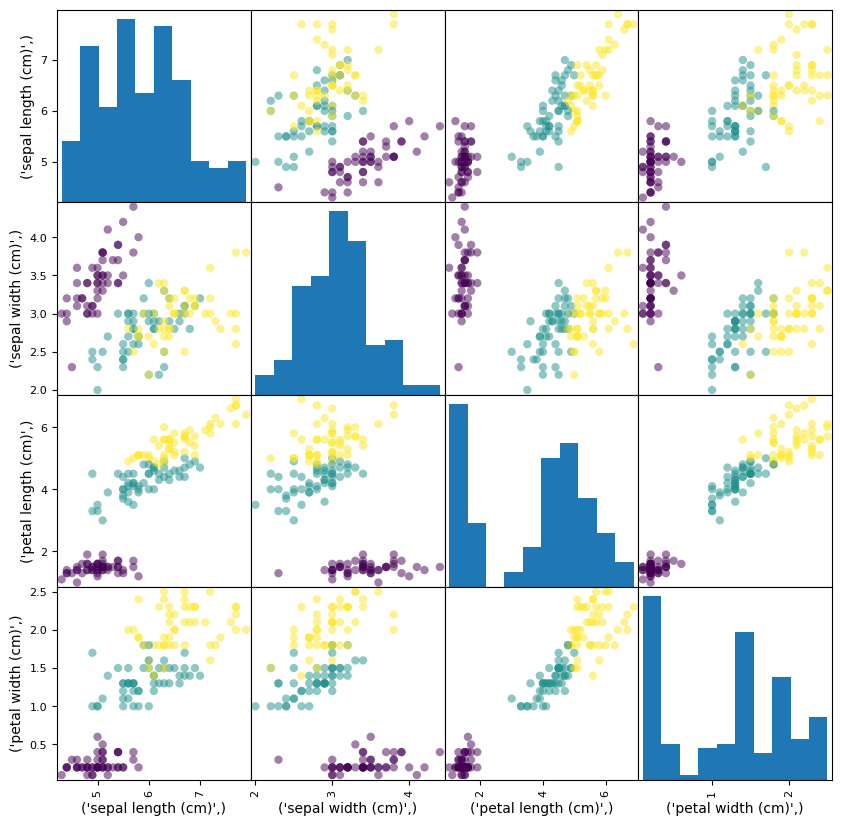

In [85]:
from sklearn.neighbors import KNeighborsClassifier


neigh3  = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(df, species_color)

neigh3_df_labels = neigh3.predict(df)
neigh3_df = pd.DataFrame(neigh3_df_labels, columns = ['species'])

pd.plotting.scatter_matrix(df, marker='-', c=neigh3_df_labels, figsize=(10, 10))#purple is one species, green is another species and yellow is the last species

neigh10 = KNeighborsClassifier(n_neighbors=10)
neigh10.fit(df, species_color)  

neigh10_df_lables = neigh10.predict(df)
neigh10_df = pd.DataFrame(neigh10_df_lables, columns = ['species'])

pd.plotting.scatter_matrix(df, marker='-', c=neigh10_df_lables, figsize=(10, 10))#purple is one species, green is another species and yellow is the last species

#The results of the predicted classification are pretty close to the true classifications.
#Training and testing my model using the same data set is not a good idea because the training of data will know all the information when it shouldn't know everything
#I think rescaling the data will help with the accuracy of the model becasue knn uses distance to classify the data and I think if some numbers are way larger it might mess with the right classification

*Complete*

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

0.8866666666666667


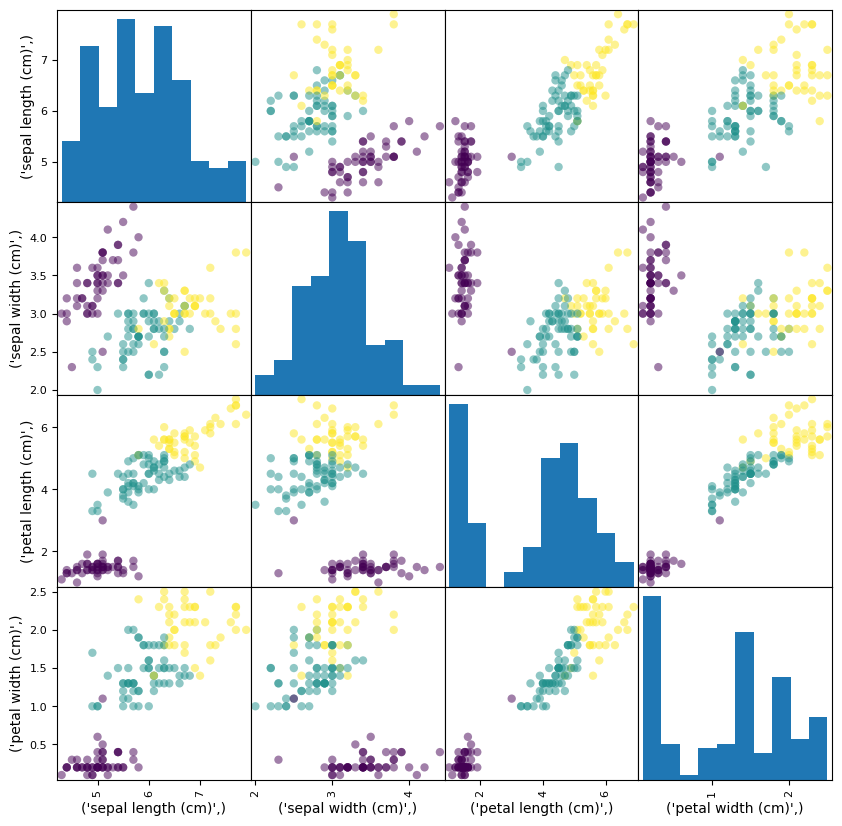

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(df, species_color)
knn5_df_labels = knn5.predict(df)
knn5_df = pd.DataFrame(knn5_df_labels, columns = ['species'])

predict5 = cross_val_predict(knn5, df, species_color, cv=3)
#first parameter is the data to fit, second parameter is the target variable we are trying to predict, 3rd is the group labels, and cv is Determines the cross-validation splitting strategy
#print(predict5)
#pd.plotting.scatter_matrix(df, marker='-', c=predict5, figsize=(10, 10))#purple is one species, green is another species and yellow is the last species

accuracy5 = accuracy_score(species_color, predict5)
#print(accuracy5) #this is 98% accurate, accuracy is true pos/total pos 


#the less amount of knn the more accurate the it is while the more amount of knn the less accurate it is, I think this has to do with the sensitivity of the knn. 
# If there are too many knn then the model is not sensitive enough to the data and it will not be able to predict the species correctly.
knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(df, species_color)
knn50_df_labels = knn50.predict(df)
knn50_df = pd.DataFrame(knn50_df_labels, columns = ['species'])

predict50 = cross_val_predict(knn50, df, species_color, cv=3)
#print(predict50)
pd.plotting.scatter_matrix(df, marker='-', c=predict50, figsize=(10, 10))#purple is one species, green is another species and yellow is the last species

accuracy50 = accuracy_score(species_color, predict50)
print(accuracy50)#this is 89% accurate, accuracy is true pos/total pos 

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [86]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import precision_score


#completness is true positive/ true positive + false negative

#purity is true positive/ true positive + false positive

true_data = iris.target

predicted_data = predict50

comp_score = completeness_score(true_data, predicted_data)
print(comp_score)

pres_score = precision_score(true_data, predicted_data, average='micro')
print(pres_score)


# I think these numbers make sense because the accuracy for the knn50 is 89% so there has to be some false positives and false negatives


0.7248065409431076
0.8866666666666667


*Complete*

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

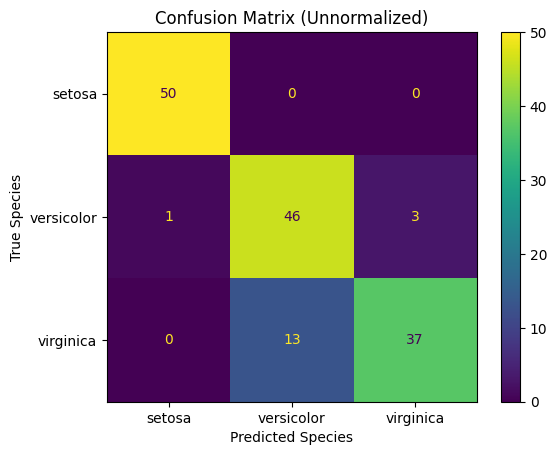

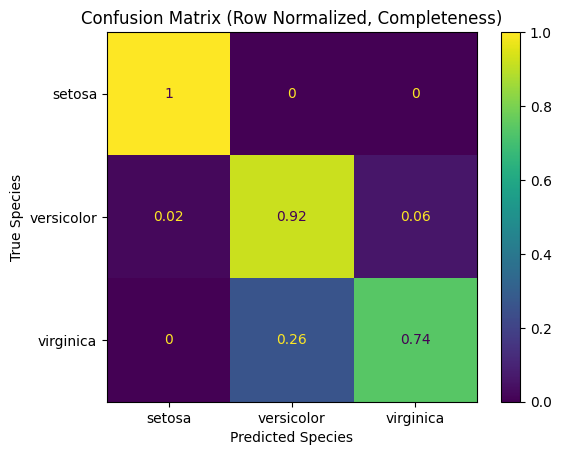

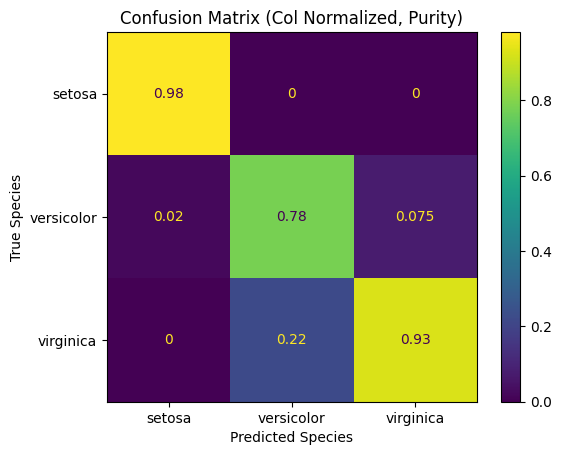

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confuse_m_unnorm = confusion_matrix(true_data, predicted_data)
confuse_m_row = confusion_matrix(true_data, predicted_data, normalize='true')
confuse_m_col = confusion_matrix(true_data, predicted_data, normalize='pred')   

# print(confuse_m_unnorm)
# print(confuse_m_row)
# print(confuse_m_col)

ConfusionMatrixDisplay(confuse_m_unnorm, display_labels=iris.target_names).plot()
plt.title('Confusion Matrix (Unnormalized)')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')

ConfusionMatrixDisplay(confuse_m_row, display_labels=iris.target_names).plot()
plt.title('Confusion Matrix (Row Normalized, Completeness)')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')

ConfusionMatrixDisplay(confuse_m_col, display_labels=iris.target_names).plot()
plt.title('Confusion Matrix (Col Normalized, Purity)')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')

plt.show()

#the row normalized confusion matrix, which is the completeness score, tells us the percentage of what was correcly labeled as a species against what was labled incorrectly.

#the column normalized confusion matrix, which is the purity score, tells us the percentage of what was correcly labeled as a species against false positives.

#I would say row normalized, completeness score is the most use full because it lets us know how well our model predicted a species correctly.




*Complete*